<a href="https://colab.research.google.com/github/Taemin11/bigdata/blob/master/bigdata_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#셀레니옴 설치
# install chromium, its driver, and selenium
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results

In [0]:
#sample test
import time
from selenium import webdriver

driver = webdriver.Chrome('/path/to/chromedriver')  # Optional argument, if not specified will search path.
driver.get('http://www.google.com/xhtml');
time.sleep(5) # Let the user actually see something!
search_box = driver.find_element_by_name('q')
search_box.send_keys('ChromeDriver')
search_box.submit()
time.sleep(5) # Let the user actually see something!
driver.quit()

In [0]:
#테이블 뽑아내기#브랜드별
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.request import urlopen
import xml.etree.ElementTree as et


options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

  
df = pd.DataFrame(columns = ["브랜드ID","년도", "구분", "1","2","3","4","5","6","7","8","9","10","11","12",])
mem = 0

#selenium의 webdriver로 크롬 브라우저를 실행
driver = webdriver.Chrome('chromedriver',options=options)


#"Google"에 접속
a = [303, 304, 307, 312,316,326,321,322,362,349,413,422,618,367,459,394,399,381,440,445,390,385,491,486,514,509,500,569,573,546,587]
brandid = 0
for brandid in a:
  driver.get("http://auto.danawa.com/auto/?Work=record&Tab=Top10&Brand=" +str(brandid) + "&Month=2019-04-00&MonthTo=")
  #html = driver.page_source
  #soup = BeautifulSoup(html,'lxml')

  #aa = soup.find_all('div', 'auto_finder auto record')
  #print(aa)

  #aab = [aa[n].find('tbody').get_text() for n in range(0, len(aa))]
  #print(aab)

  #title = driver.find_element_by_xpath('//*[@id="autodanawa_gridC"]/div[3]/article/main/div/table[2]/thead/tr')
  source = driver.find_element_by_xpath('//*[@id="autodanawa_gridC"]/div[3]/article/main/div/table[1]/thead')
  col = source.text
  col = col.split(" ")
  source2 = driver.find_element_by_xpath('//*[@id="autodanawa_gridC"]/div[3]/article/main/div/table[1]/tbody')
  sss = source2.text
  sss = sss.split("\n")
  #print(sss)
  
  for i in range(0, len(sss)):
    sss[i] = sss[i].split(" ")
    df.loc[i+1 + mem] = np.nan
    df.loc[i+1+ mem][0] = brandid
    if i%4 == 1:
      df.loc[i+1+ mem][1] = [sss[0][0]] 
    elif i%4 == 3:
      df.loc[i+1+ mem][1] = [sss[2][0]]
    
    
    if i%2 == 1:
      for j in range(0, len(sss[i])):
        df.loc[i+1+ mem][j+2] = [sss[i][j]]
    else :
      for j in range(0, len(sss[i])):
        df.loc[i+1+ mem][j+1] = [sss[i][j]]
        
  mem = mem + 4
  print(mem/4)
  

#to csv
!mkdir -p google_drive/test_colab
#df = pd.DataFrame(np.random.rand(10, 5))
df.to_csv("google_drive/test_colab/SalesForBrand.csv")
!ls -Fcal google_drive/test_colab
#//*[@id="autodanawa_gridC"]/div[3]/article/main/div/table[1]/tbody/tr[1]/td[3]

1.0
2.0


KeyboardInterrupt: ignored

In [0]:
#전처리 및 분석
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import tensorflow as tf

#파일 불러오기
df = pd.read_csv("google_drive/test_colab/SalesForAllN.csv",encoding='cp949')###자동차 판매량
dfs = pd.read_csv("google_drive/test_colab/SalesForSearch.csv", encoding='cp949')###자동차 검색량
#필요 없는 col 제거
del df["Unnamed: 0"]
#필요 없는 low 제거
df = df.drop(df.index[10])
#쓰레기값, 공백 제거및 대체
for i in range(0, 177):
  #print("i:",i)
  if i == 11:
    print(i,"11")
  else:
    if i == 10:
      i = 11
    for j in range(2, 15):

      if df.loc[i][j] == np.nan:
        df.loc[i][j] = 0
        df.loc[i][j] = np.int64(df.loc[i][j])
      else:      
        df.loc[i][j] = df.loc[i][j].replace("-", "0") 
        df.loc[i][j] = df.loc[i][j].replace(",", "") 
        df.loc[i][j] = np.int64(df.loc[i][j])

#object type에서 int64 type으로 형변환
df["18.04"] = df["18.04"].astype("int64")
df["18.05"] = df["18.05"].astype("int64")
df["18.06"] = df["18.06"].astype("int64")
df["18.07"] = df["18.07"].astype("int64")
df["18.08"] = df["18.08"].astype("int64")
df["18.09"] = df["18.09"].astype("int64")
df["18.1"] = df["18.1"].astype("int64")
df["18.11"] = df["18.11"].astype("int64")
df["18.12"] = df["18.12"].astype("int64")
df["19.01"] = df["19.01"].astype("int64")
df["19.02"] = df["19.02"].astype("int64")
df["19.03"] = df["19.03"].astype("int64")
df["19.04"] = df["19.04"].astype("int64")

#두 데이터 같은 형식으로 변환

df = pd.pivot_table(df, index='CarID')
df = np.swapaxes(df, 0, 1)
df = pd.DataFrame(np.array(df))

del df[170]
del df[171]
del df[172]
del df[173]
dfs = pd.pivot_table(dfs, index='CarID')
dfs = pd.DataFrame(np.array(dfs))



#print(df.loc[7][8])
#df.corr()
#print(dfs)      
#print(df) ###자동차 판매량
#print(dfs) ###자동차 검색량

###
###
###선형 회귀 분석
#scatter graph
def scatter_graph(n, m):
  plt.plot(xd, yd, "ro")
  plt.legend()
  plt.title("Search/Sales : "+ str(m))
  plt.ylabel("Search")
  plt.xlabel("Sales")
  #plt.axis([0, 6000, 0, 40])
  plt.show()
#선형회귀  
def linear_regression(xd, yd):
  W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
  b = tf.Variable(tf.zeros([1]))
  y = xd * W + b
  loss = tf.reduce_mean(tf.square(y-yd))
  optimizer = tf.train.GradientDescentOptimizer(0.5)
  train = optimizer.minimize(loss) 
  init = tf.global_variables_initializer() 
  sess = tf.Session()
  sess.run(init)  

  dkk = pd.DataFrame({"X": xd, "Y":yd})
  correlation = dkk["X"].corr(dkk["Y"])
  COF = correlation*correlation
  print ("Correlation is:", correlation)
  aCOF2 = COF2(list(dkk["X"]), list(dkk["Y"]), sess.run(W), sess.run(b))
  print ("COF is:", COF, aCOF2)
  return correlation
#정확도 계산
def COF2 (x, y, W, b):
    SSE_list = []
    SST_list = []
    SSR_list = []
    for i in range(len(x)): 
        SSE_list.append(np.square((y[i]-(W*x[i] + b))))
    SSE = sum(SSE_list)
    for i in range(len(x)):
        SSR_list.append(np.square((np.mean(y)-(y[i]-(W*x[i] + b)))))
    SSR = sum(SSR_list)
    SST = SSE + SSR
    return(SSR/SST)

ttt1 = [0]*150
t1 = 0
ttt2 = [0]*150
t2 = 0
ttt3 = [0]*150
t3 = 0
ttt4 = [0]*150
t4 = 0
ttt5 = [0]*150
t5 = 0
ttt6 = [0]*150
t6 = 0
ttt7 = [0]*150
t7 = 0
  
for t in range(0,170):
  linn = np.zeros((1*13,2))  
  for l in range(0,13):
    linn[l] = [df.loc[l][t] , dfs.loc[l][t]]
  xd = [v[0] for v in linn]
  yd = [v[1] for v in linn]
  scatter_graph(linn,t)  
  co = linear_regression(xd, yd)
  print("t: ",t," co: ",co)
  if co >=0.7:
    ttt1[t1] = t  
    t1 += 1
  elif co >=0.3 and co<0.7:
    ttt2[t2] = t  
    t2 += 1
  elif co >=0.1 and co< 0.3:
    ttt3[t3] = t
    t3 += 1
  elif co >=-0.1 and co <0.1:
    ttt4[t4] = t   
    t4 += 1
  elif co >=-0.3 and co <-0.1:
    ttt5[t5] = t 
    t5 += 1
  elif co >=-0.7 and co <-0.3:
    ttt6[t6] = t   
    t6 += 1
  elif co >=-1.0 and co < -0.7:
    ttt7[t7] = t 
    t7 += 1



  
   
lin = np.zeros((170*13,2))
for t in range(0,170):  
  for l in range(0,13):
    lin[l+t*13] = [df.loc[l][t] , dfs.loc[l][t]]   

print(lin)    
 
xd = [v[0] for v in lin]
yd = [v[1] for v in lin]
scatter_graph(lin,t)
linear_regression(xd, yd)

  
raw_data = {"t1" : ttt1,"t2" : ttt2,"t3" : ttt3,"t4" : ttt4,"t5" : ttt5,"t6" : ttt6, "t7" : ttt7}
tttt = pd.DataFrame(raw_data)

print(tttt)

#scatter_graph(lin)  
#plt.show()

'''
!mkdir -p google_drive/test_colab
tttt.to_csv("google_drive/test_colab/tierdata.csv")
!ls -Fcal google_drive/test_colab
'''



No handles with labels found to put in legend.


Text(0.5, 0, 'Correlation')

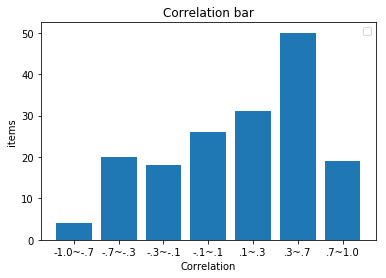

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

df = pd.read_csv("google_drive/test_colab/tierdata.csv",encoding='cp949')#피어슨 티어 데이터
ttt1 = [0]
ttt2 = [0]
ttt3 = [0]
ttt4 = [0]
ttt5 = [0]
ttt6 = [0]
ttt7 = [0]



for i in range (0,150):
  if df.loc[i][1] > 0:
    ttt1[0] += 1
    
for i in range (0,150):
  if df.loc[i][2] > 0:
    ttt2[0] += 1;
    
for i in range (0,150):
  if df.loc[i][3] > 0:
    ttt3[0] += 1;
    
for i in range (0,150):
  if df.loc[i][4] > 0:
    ttt4[0] += 1;
    
for i in range (0,150):
  if df.loc[i][5] > 0:
    ttt5[0] += 1;
    
for i in range (0,150):
  if df.loc[i][6] > 0:
    ttt6[0] += 1;

for i in range (0,150):
  if df.loc[i][7] > 0:
    ttt7[0] += 1;


ttt3[0] +=1    
raw_data = {"-1.0~-.7" : ttt7, "-.7~-.3" : ttt6,"-.3~-.1" : ttt5,"-.1~.1" : ttt4,".1~.3" : ttt3,".3~.7" : ttt2, ".7~1.0" : ttt1}
tttt = pd.DataFrame(raw_data)

plt.bar(tttt.columns, tttt.loc[0])
plt.legend()
plt.title("Correlation bar")
plt.ylabel("items")
plt.xlabel("Correlation")


In [0]:
#drive에 경로 생성
!mkdir -p google_drive
!google-drive-ocamlfuse -o nonempty google_drive

In [0]:
#drive 연동 툴
!apt install -y -qq --fix-broken python-pycurl python-apt 2> /dev/null
!apt install -y -qq software-properties-common module-init-tools 2> /dev/null
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt update -qq 2>&1 > /dev/null
!apt install -y -qq google-drive-ocamlfuse fuse 2> /dev/null

from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
creds = GoogleCredentials.get_application_default()

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

from getpass import getpass

vcode = getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
#팝업창에 있는 표 뽑아오기#차종별
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
import numpy as np

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

df = pd.DataFrame(columns = ["브랜드ID", "CarID", "년월", "18.04", "18.05", "18.06", "18.07", "18.08", "18.09", "18.10", "18.11", "18.12", "19.01", "19.02", "19.03", "19.04"])
mem = 1  

#selenium의 webdriver로 크롬 브라우저를 실행
driver = webdriver.Chrome('chromedriver',options=options)
#303
a = [303,304]#,307,312,316,326,321,322,362,349,413,422,618,367,459,394,399,381,440,445,390,385,491,486,514,509,500,569,573,546,587]

for brandid in a:
  #print("check")
  k = mem
  for i in range(1, 61):
    try:  
      #메인 브라우저 크롬 사용
      driver = webdriver.Chrome('chromedriver',options=options)
      #메인 사이트 불러오기
      driver.get("http://auto.danawa.com/auto/?Work=record&Tab=Top10&Brand="+str(brandid)+"%22&Month=2019-04-00&MonthTo=")
      #팝업 버튼 xpath저장
      source = driver.find_element_by_xpath('//*[@id="autodanawa_gridC"]/div[3]/article/main/div/table[2]/tbody/tr['+ str(i)+']/td[5]/button')
      #팝업 클릭
      rt = source.click()
      #필요한 데이터 테이블 xpath저장
      source2 = driver.find_element_by_xpath('//*[@id="popup_data"]/table/tbody')
      #테이블 데이터 쪼개서 분류, 저장
      sss = source2.text
      sss = sss.split()
      df.loc[k] = np.nan
      df.loc[k][0] = brandid
      df.loc[k][1] = i #carid
      for t in range(0, len(sss)):
        if t > 13:
          print(t)
        else:
          df.loc[k][t+2] = sss[t]
      k += 1
      #print("k:" + str(k))     
      #print(sss)
      #예외처리 : 브라우저가 안 열릴 때
    except NoSuchElementException:
      print(i)   
  #mem = k
  #print("mem::" + str(mem))
#브라우저 닫기
driver.close()
#csv로 저장
!mkdir -p google_drive/test_colab
df.to_csv("google_drive/test_colab/SalesForCarTest.csv")
!ls -Fcal google_drive/test_colab 


2
3
5
6
7
8
9
11
12
13
14
16
17
18
20
21
22
14
15
16
17
18
19
20
21
22
23
24
25
26
24
25
26
27
28
30
31
32
34
35
36
37
39
40
42
43
44
47
48
49
50
51
53
54
56
57
59
60
14
15
16
17
18
19
20
21
22
23
24
25
26
2
3
4
5
7
8
9
10
11
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
total 12
drwxr-xr-x 2 root root 4096 Jun 14 13:03 ./
drwxr-xr-x 3 root root 4096 Jun 14 13:03 ../
-rw-r--r-- 1 root root 1423 Jun 14 13:03 SalesForCarTest.csv
